HERE WE WILL BE IMPLEMENTING LOGISTIC REGRESSION ON THE BINARY-CLASSIFICATION DATASET

In [1]:
import numpy as np
import pandas as pd
from logistic_regression import LogisticRegressionFromScratch


In [2]:
df=pd.read_csv('train_binary.csv')
X=df.drop('label',axis=1).values
y=df['label'].values
print(X.shape)
print(y.shape)

#feature scaling
from scaling import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
#adding bias term
X=np.hstack((np.ones((X.shape[0],1)),X))

from train_test_split import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,shuffle=True)
   




(50000, 25)
(50000,)


Epoch 0 | Loss = 0.69315
Epoch 100 | Loss = 0.31362
Epoch 200 | Loss = 0.20496
Epoch 300 | Loss = 0.15448
Epoch 400 | Loss = 0.12518
Epoch 500 | Loss = 0.10595
Epoch 600 | Loss = 0.09230
Epoch 700 | Loss = 0.08208
Epoch 800 | Loss = 0.07412
Epoch 900 | Loss = 0.06772
Epoch 1000 | Loss = 0.06247
Epoch 1100 | Loss = 0.05807
Epoch 1200 | Loss = 0.05433
Epoch 1300 | Loss = 0.05110
Epoch 1400 | Loss = 0.04829
Epoch 1499 | Loss = 0.04584


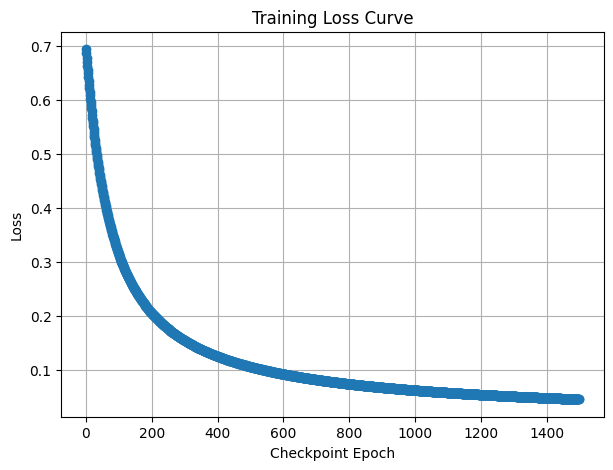

In [3]:
model=LogisticRegressionFromScratch(lr=0.01,n_iters=1500,reg_lambda=0)
model.fit(X_train,y_train,store_every=100,verbose=True)

y_pred=model.predict(X_cv)

model.plot_loss_curve("Training Loss Curve")

In [5]:
from metrics import accuracy,precision_recall_f1,confusion_matrix
acc=accuracy(y_cv,y_pred)
prec,recall,f1=precision_recall_f1(y_cv,y_pred)
cm=confusion_matrix(y_cv,y_pred)

print(f"Accuracy: {acc}")
print(f"Precision: {prec}, Recall: {recall}, F1-Score: {f1}")
print(f"Confusion Matrix:{cm}")

Accuracy: 0.9991
Precision: 0.9980456026055381, Recall: 0.9990218454512556, F1-Score: 0.9985334849160018
Confusion Matrix:[[6927    6]
 [   3 3064]]
